In [440]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [441]:
data=pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
print(data.shape)

(299, 13)


In [442]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)
threshold = 3
print(np.where(z > 3))
data = data[(z < 3).all(axis=1)]
data.shape

[[1.19294523e+00 8.71104775e-01 1.65728387e-04 ... 6.87681906e-01
  1.62950241e+00 1.45416070e+00]
 [4.91279276e-01 8.71104775e-01 7.51463953e+00 ... 6.87681906e-01
  1.60369074e+00 1.45416070e+00]
 [3.50832977e-01 8.71104775e-01 4.49938761e-01 ... 1.45416070e+00
  1.59078490e+00 1.45416070e+00]
 ...
 [1.33339153e+00 8.71104775e-01 1.52597865e+00 ... 6.87681906e-01
  1.90669738e+00 6.87681906e-01]
 [1.33339153e+00 8.71104775e-01 1.89039811e+00 ... 1.45416070e+00
  1.93250906e+00 6.87681906e-01]
 [9.12335403e-01 8.71104775e-01 3.98321274e-01 ... 1.45416070e+00
  1.99703825e+00 6.87681906e-01]]
(array([  1,   4,   9,  19,  28,  52,  52,  60,  64,  72, 103, 105, 109,
       131, 134, 171, 199, 217, 228, 296]), array([2, 8, 7, 8, 7, 2, 7, 2, 4, 2, 2, 6, 6, 7, 2, 2, 8, 7, 7, 6]))


(280, 13)

In [443]:
print(data.columns)
y=data['DEATH_EVENT']
X=data.drop(['DEATH_EVENT'], axis = 1)
y.value_counts()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


0    194
1     86
Name: DEATH_EVENT, dtype: int64

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
scaler=MinMaxScaler()
scaler.fit(x2)
X=scaler.transform(x2)
X=pd.DataFrame(data=X,columns=['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'])
print(X.shape)
print(X.head())
print(X.columns)

#pca=PCA(n_components=3)
#pca.fit(scale_data)
#x_pca=pca.transform(scale_data)
#x_pca.shape


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.077359,-0.099273,-0.082555,0.106414,0.086032,-0.028379,0.231830,-0.033756,0.058342,-0.007560,-0.236505,0.259299
anaemia,0.077359,1.000000,-0.144906,-0.014291,0.037141,0.014892,-0.017951,-0.051654,0.090741,-0.086821,-0.098411,-0.136298,0.039480
creatinine_phosphokinase,-0.099273,-0.144906,1.000000,0.011658,-0.078583,-0.046820,-0.047819,-0.087296,0.063430,0.033589,-0.079764,0.151120,-0.029289
diabetes,-0.082555,-0.014291,0.011658,1.000000,-0.007449,-0.003070,0.067170,-0.053498,-0.063822,-0.159301,-0.136820,0.033602,0.001009
ejection_fraction,0.106414,0.037141,-0.078583,-0.007449,1.000000,0.038059,0.101141,-0.177942,0.182741,-0.115985,-0.040007,0.039776,-0.303506
high_blood_pressure,0.086032,0.014892,-0.046820,-0.003070,0.038059,1.000000,0.057272,-0.051845,0.005079,-0.109578,-0.059963,-0.217323,0.064143
platelets,-0.028379,-0.017951,-0.047819,0.067170,0.101141,0.057272,1.000000,-0.041153,0.021204,-0.140444,-0.023075,0.000260,-0.048259
serum_creatinine,0.231830,-0.051654,-0.087296,-0.053498,-0.177942,-0.051845,-0.041153,1.000000,-0.245860,0.091135,-0.008193,-0.157540,0.329460
serum_sodium,-0.033756,0.090741,0.063430,-0.063822,0.182741,0.005079,0.021204,-0.245860,1.000000,-0.053602,0.006677,0.074459,-0.203471
sex,0.058342,-0.086821,0.033589,-0.159301,-0.115985,-0.109578,-0.140444,0.091135,-0.053602,1.000000,0.444387,-0.007837,0.012900


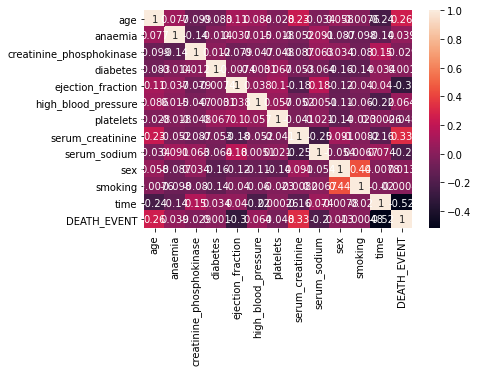

In [444]:
import seaborn as sns
corelation=data.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)
corelation

import matplotlib.pyplot as plt
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='plasma')
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_pca_train,x_pca_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.2,random_state=0,shuffle=True)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_pca_train, y_train)
y_pred=classifier.predict(x_pca_test)
print(accuracy_score(y_test, y_pred))


In [445]:
# X=X.drop(columns=[ 'anaemia', 'creatinine_phosphokinase', 'diabetes',
#         'high_blood_pressure', 'platelets',
#         'sex', 'smoking'],axis=1)
# X=pd.DataFrame(data=X,columns=['age','ejection_fraction','serum_creatinine','serum_sodium', 'time'])
# X.head()

In [446]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=StandardScaler()
scaled_value=scaler.fit_transform(X)
X.iloc[:,:]=scaled_value

In [447]:
# from imblearn.over_sampling import RandomOverSampler 
# os=RandomOverSampler() 
# X_train,y_train=os.fit_sample(X_train,y_train) 
# y_train.value_counts()

from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler()
X,y=os.fit_sample(X,y)
y.value_counts()

47
0.8500000000000001
24
0.9285714285714286


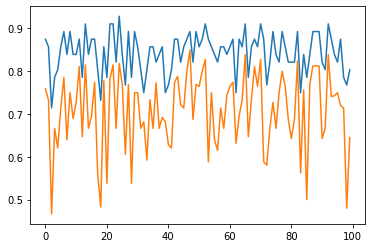

In [448]:
f1=[]
ac=[]
import matplotlib.pyplot as plt
for i in range(0,100):
    from sklearn.model_selection import train_test_split
    X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=i)
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
    from sklearn.metrics import roc_auc_score,classification_report
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from lightgbm import LGBMClassifier
    from xgboost import XGBClassifier
    model =RandomForestClassifier(max_depth=3,random_state=i)
    model.fit(X_train, y_train)
    y_predict=model.predict(X_dev)
    f1.append(f1_score(y_dev,y_predict))
    ac.append(accuracy_score(y_dev,y_predict))
print(f1.index(max(f1)))
print(max(f1))
print(ac.index(max(ac)))
print(max(ac))
plt.plot(np.arange(0,100),ac)
plt.plot(np.arange(0,100),f1)
plt.show()

92
0.875
92
0.9285714285714286


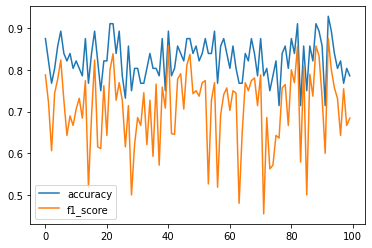

In [449]:
f1=[]
ac=[]
import matplotlib.pyplot as plt
for i in range(0,100):
    from sklearn.model_selection import train_test_split
    X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=i)
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
    from sklearn.metrics import roc_auc_score,classification_report
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from lightgbm import LGBMClassifier
    from xgboost import XGBClassifier
    model =XGBClassifier()
    model.fit(X_train, y_train)
    y_predict=model.predict(X_dev)
    f1.append(f1_score(y_dev,y_predict))
    ac.append(accuracy_score(y_dev,y_predict))
print(f1.index(max(f1)))
print(max(f1))
print(ac.index(max(ac)))
print(max(ac))
plt.plot(np.arange(0,100),ac)
plt.plot(np.arange(0,100),f1)
plt.legend(['accuracy','f1_score'])
plt.show()

82
0.8888888888888888
24
0.9285714285714286


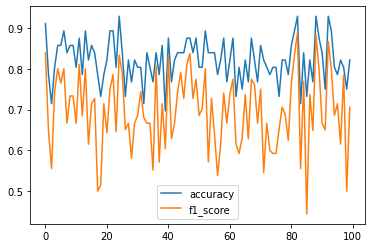

In [450]:
f1=[]
ac=[]
import matplotlib.pyplot as plt
for i in range(0,100):
    from sklearn.model_selection import train_test_split
    X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=i)
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
    from sklearn.metrics import roc_auc_score,classification_report
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from lightgbm import LGBMClassifier
    from xgboost import XGBClassifier
    model =LGBMClassifier(learning_rate=0.1)
    model.fit(X_train, y_train)
    y_predict=model.predict(X_dev)
    f1.append(f1_score(y_dev,y_predict))
    ac.append(accuracy_score(y_dev,y_predict))
print(f1.index(max(f1)))
print(max(f1))
print(ac.index(max(ac)))
print(max(ac))
plt.plot(np.arange(0,100),ac)
plt.plot(np.arange(0,100),f1)
plt.legend(['accuracy','f1_score'])
plt.show()

82
0.8888888888888888
82
0.9285714285714286


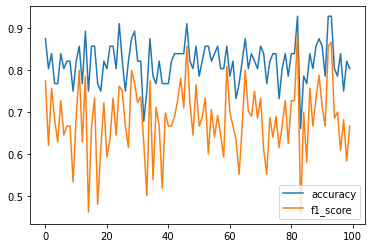

In [451]:
f1=[]
ac=[]
import matplotlib.pyplot as plt
for i in range(0,100):
    from sklearn.model_selection import train_test_split
    X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=i)
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
    from sklearn.metrics import roc_auc_score,classification_report
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from lightgbm import LGBMClassifier
    from xgboost import XGBClassifier
    model =LogisticRegression()
    model.fit(X_train, y_train)
    y_predict=model.predict(X_dev)
    f1.append(f1_score(y_dev,y_predict))
    ac.append(accuracy_score(y_dev,y_predict))
print(f1.index(max(f1)))
print(max(f1))
print(ac.index(max(ac)))
print(max(ac))
plt.plot(np.arange(0,100),ac)
plt.plot(np.arange(0,100),f1)
plt.legend(['accuracy','f1_score'])
plt.show()

In [452]:
from sklearn.model_selection import GridSearchCV
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
model1=LogisticRegression()
grid_search = GridSearchCV(estimator=model1, param_grid=grid, n_jobs=-1, cv=3, scoring='f1_micro',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
print(grid_result.best_params_)

{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [453]:
X_train,X_dev,y_train,y_dev=train_test_split(X, y, test_size=0.2, random_state=82)
model2=grid_result.best_estimator_
model2.fit(X_train,y_train)
y_pred=model2.predict(X_dev)
print(f1_score(y_dev,y_pred))

0.8888888888888888
